[Analyzing Natality Data Using Vertex AI and BigQuery](https://www.cloudskillsboost.google/focuses/604?catalog_rank=%7B%22rank%22%3A1%2C%22num_filters%22%3A0%2C%22has_search%22%3Atrue%7D&parent=catalog&search_id=23667145)

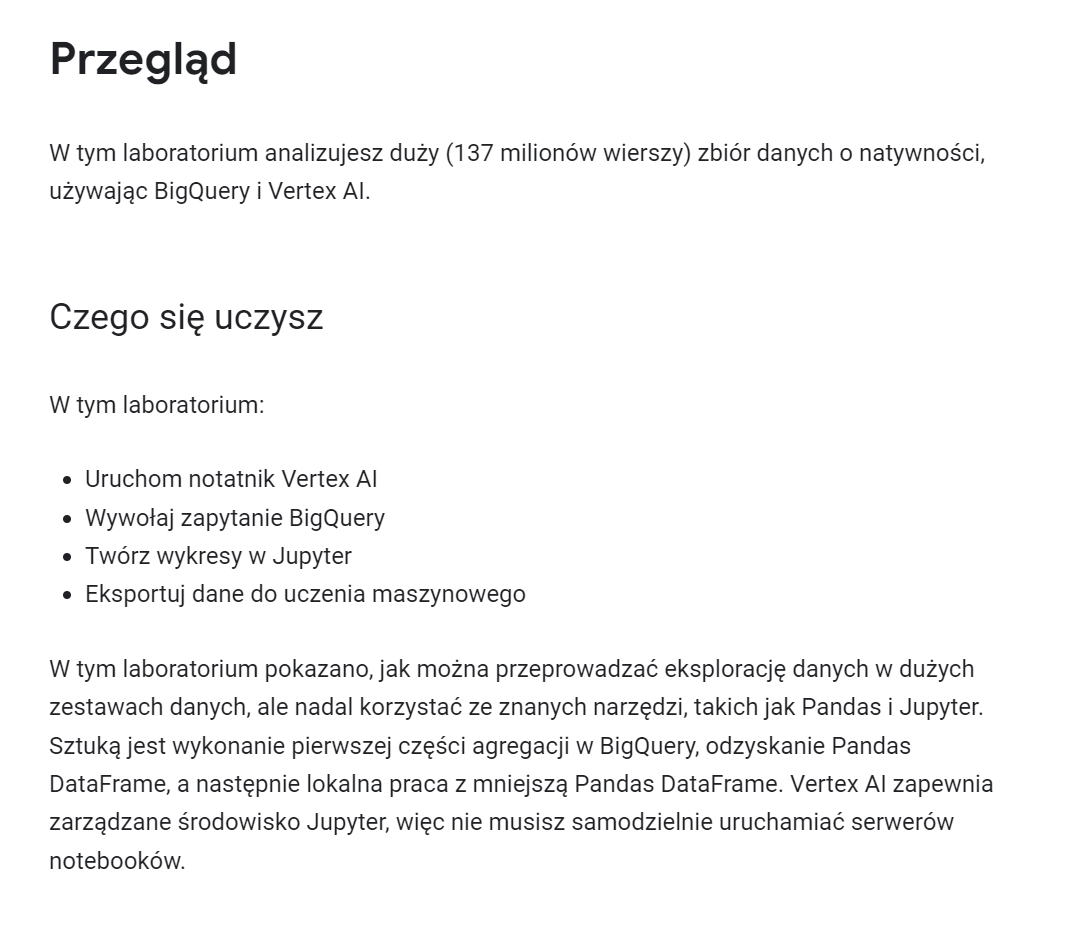

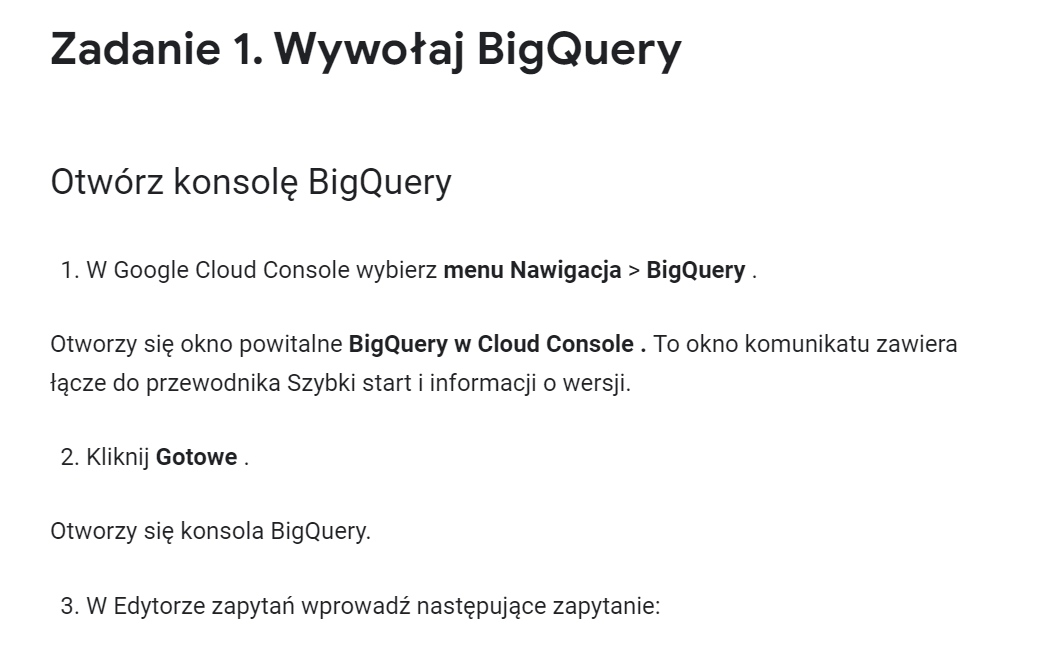

In [ ]:
%%bigquery

SELECT
  plurality,
  COUNT(1) AS num_babies,
  AVG(weight_pounds) AS ave_weight
FROM
  `bigquery-public-data.samples.natality`
WHERE
  year > 2000 AND year < 2005
GROUP BY
  plurality

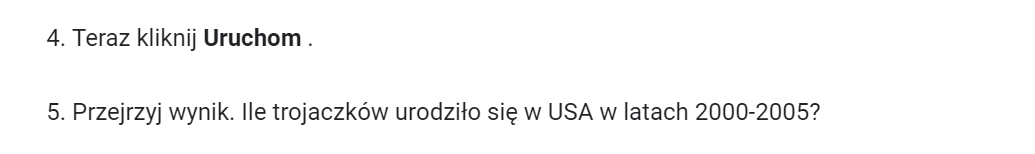

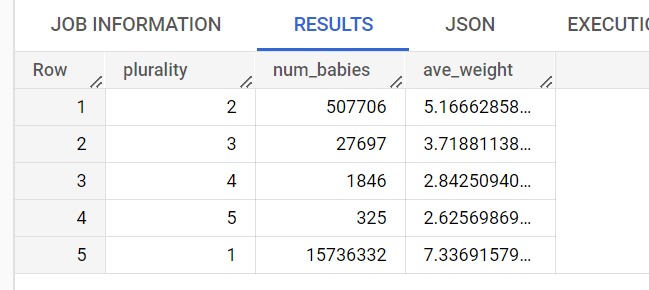

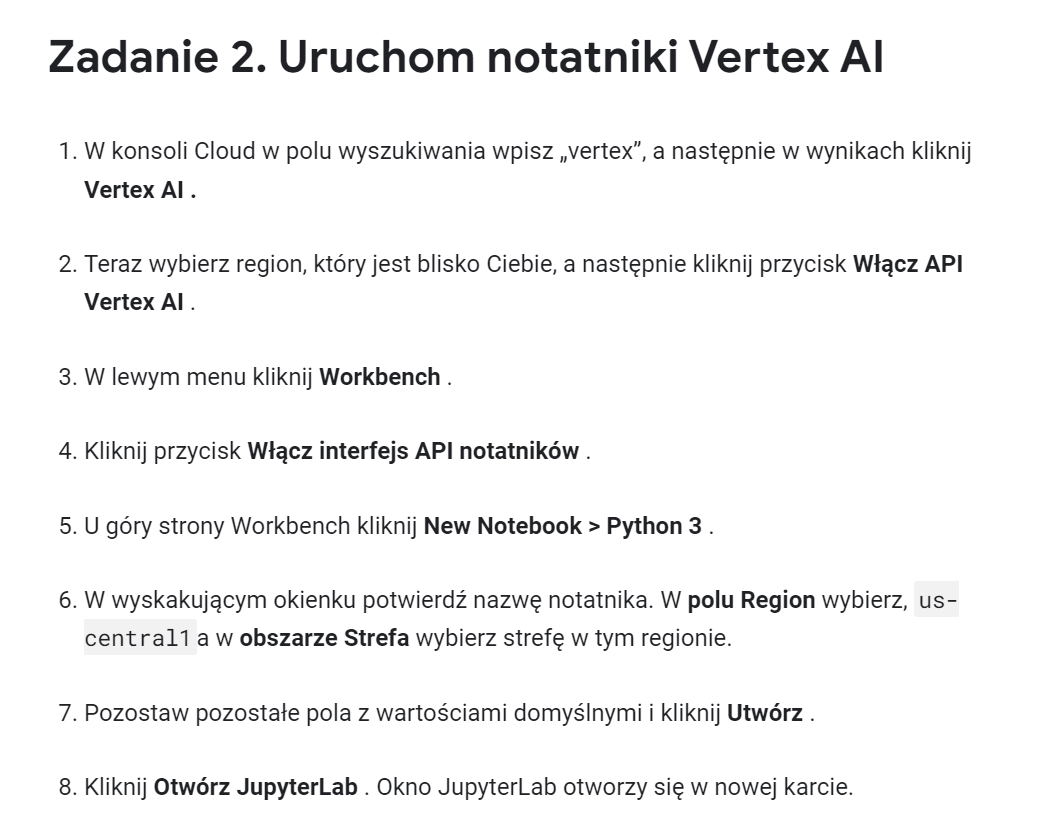

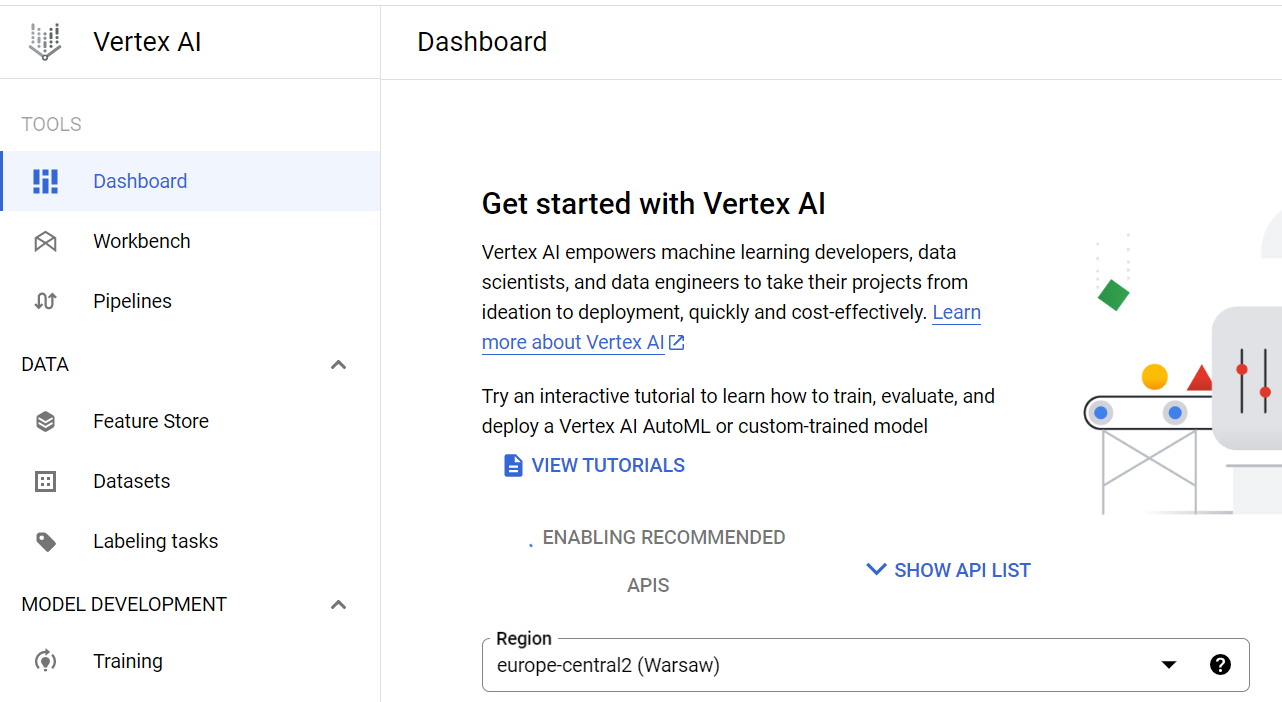

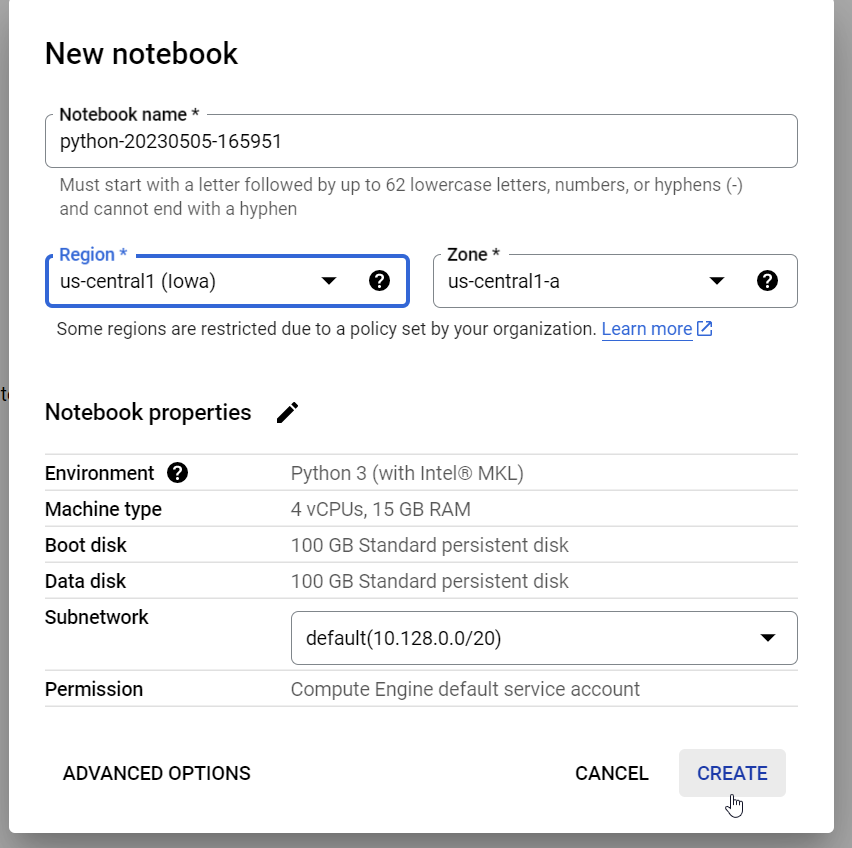

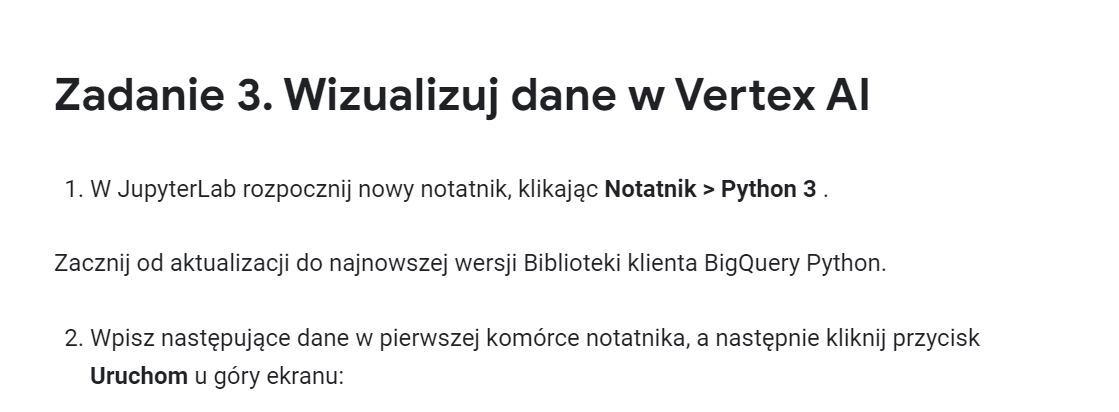

In [ ]:
!pip install google-cloud-bigquery==1.25.0
!pip install --upgrade google-cloud-bigquery-storage

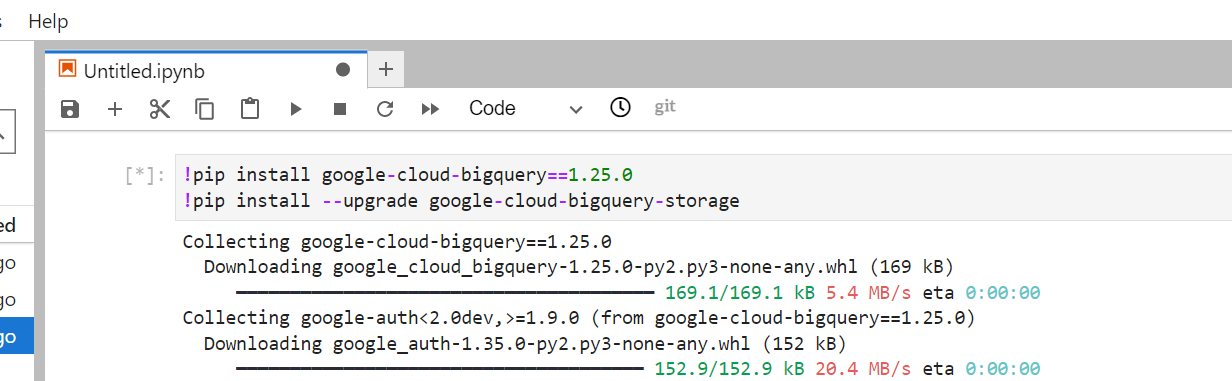

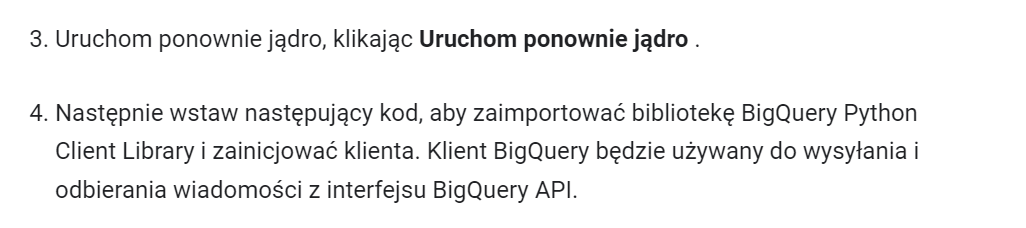

In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

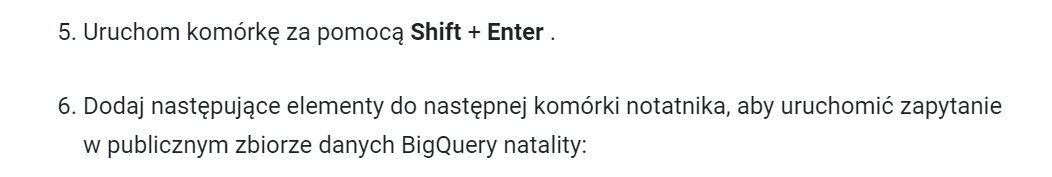

In [ ]:
sql = """
  SELECT
    plurality,
    COUNT(1) AS count,
    year
  FROM
    `bigquery-public-data.samples.natality`
  WHERE
    NOT IS_NAN(plurality) AND plurality > 1
  GROUP BY
    plurality, year
  ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()

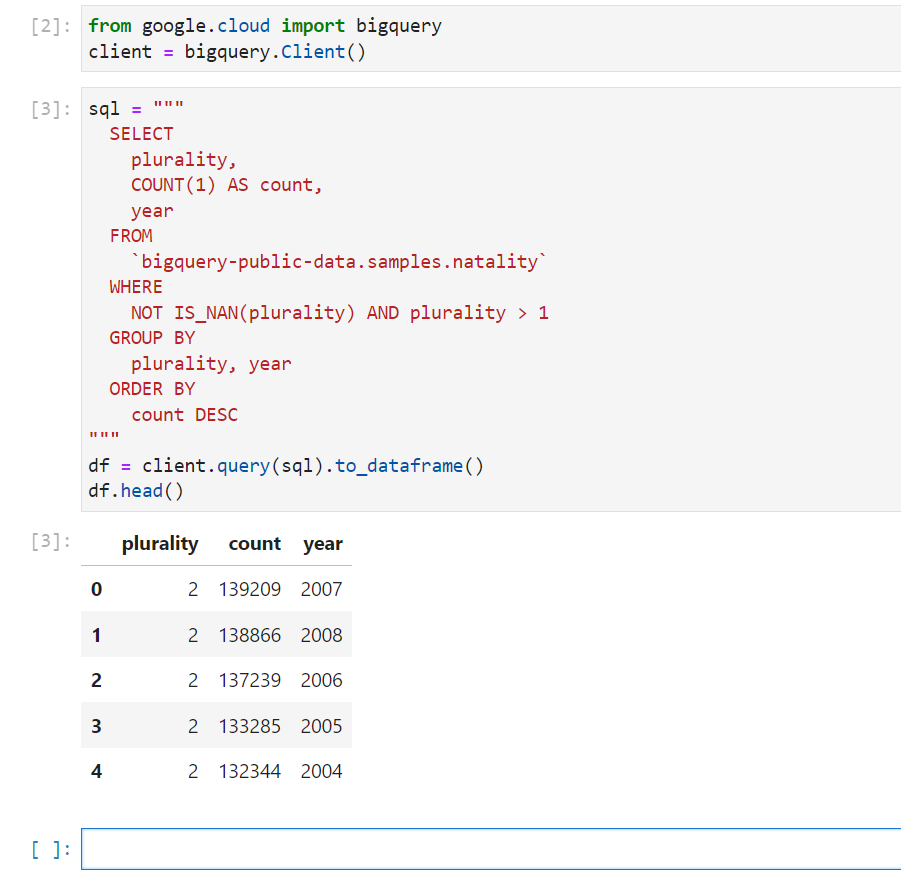

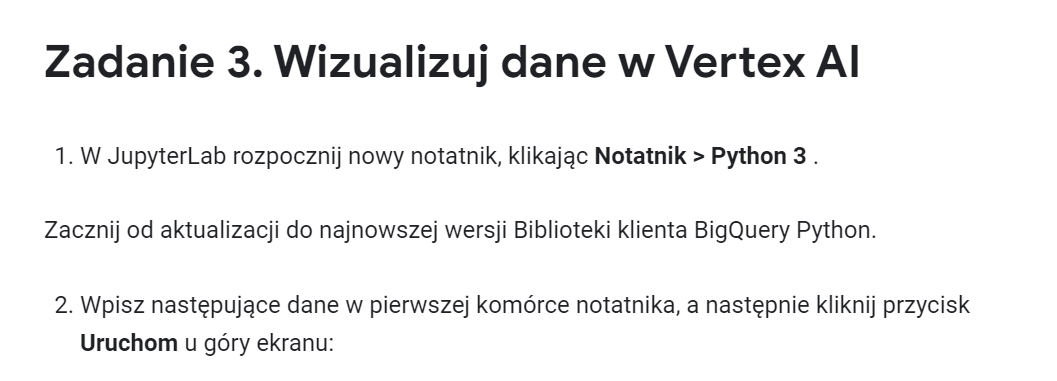

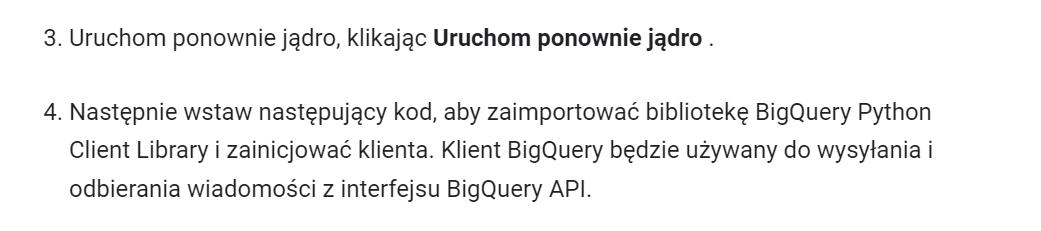

In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

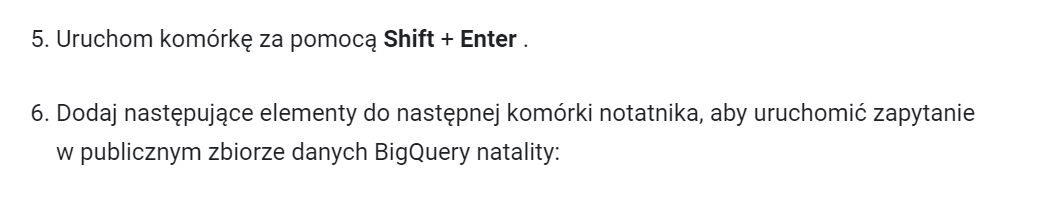

In [ ]:
sql = """
  SELECT
    plurality,
    COUNT(1) AS count,
    year
  FROM
    `bigquery-public-data.samples.natality`
  WHERE
    NOT IS_NAN(plurality) AND plurality > 1
  GROUP BY
    plurality, year
  ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()

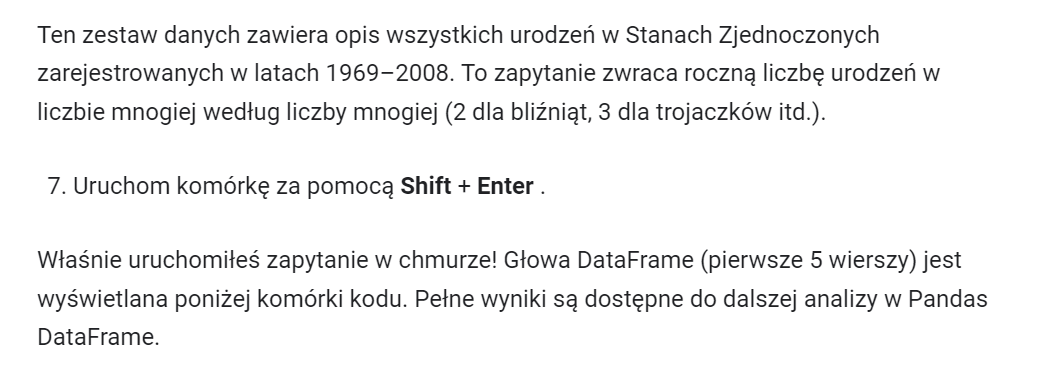

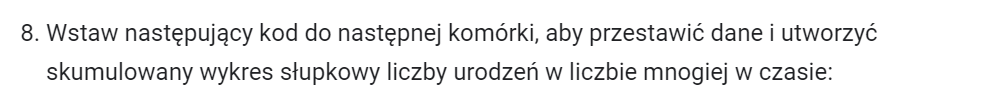

In [ ]:
pivot_table = df.pivot(index='year', columns='plurality', values='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(15,7));

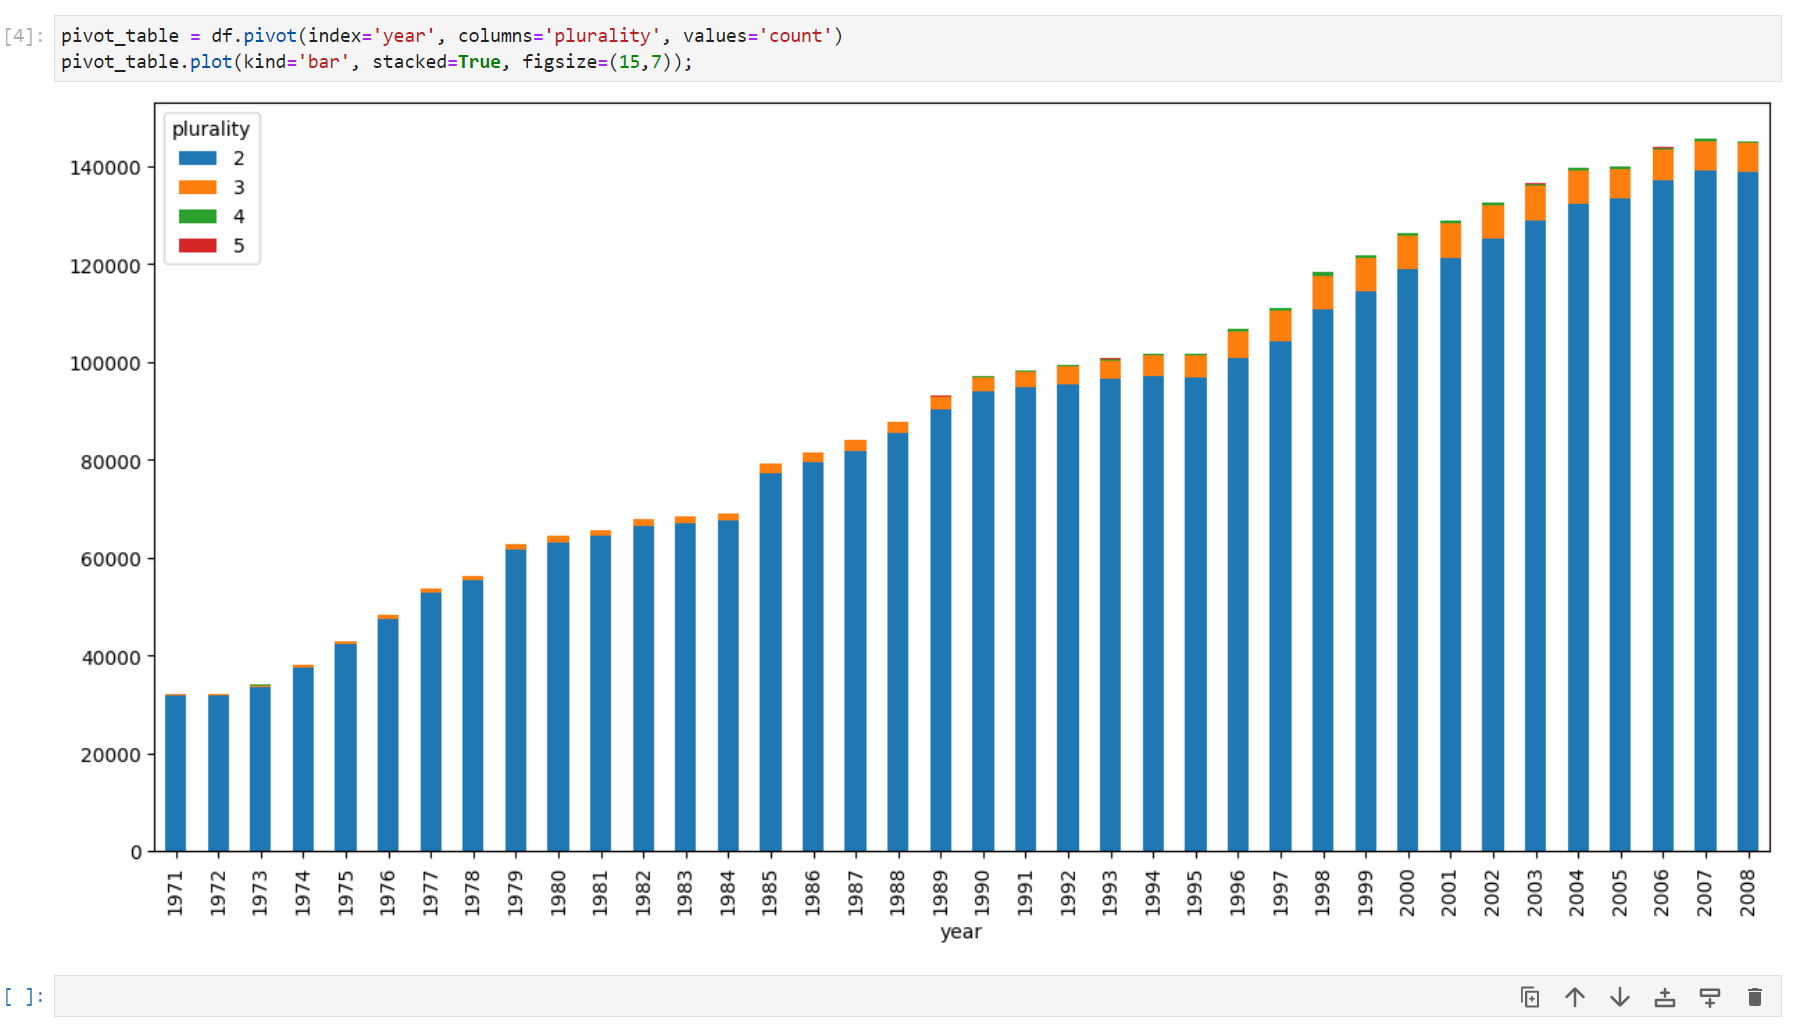

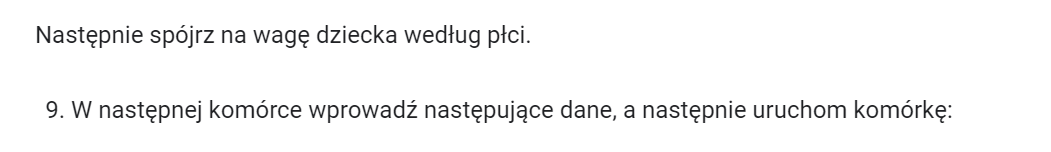

In [ ]:
sql = """
  SELECT
    is_male,
    AVG(weight_pounds) AS ave_weight
  FROM
    `bigquery-public-data.samples.natality`
  GROUP BY
    is_male
"""
df = client.query(sql).to_dataframe()
df.plot(x='is_male', y='ave_weight', kind='bar');

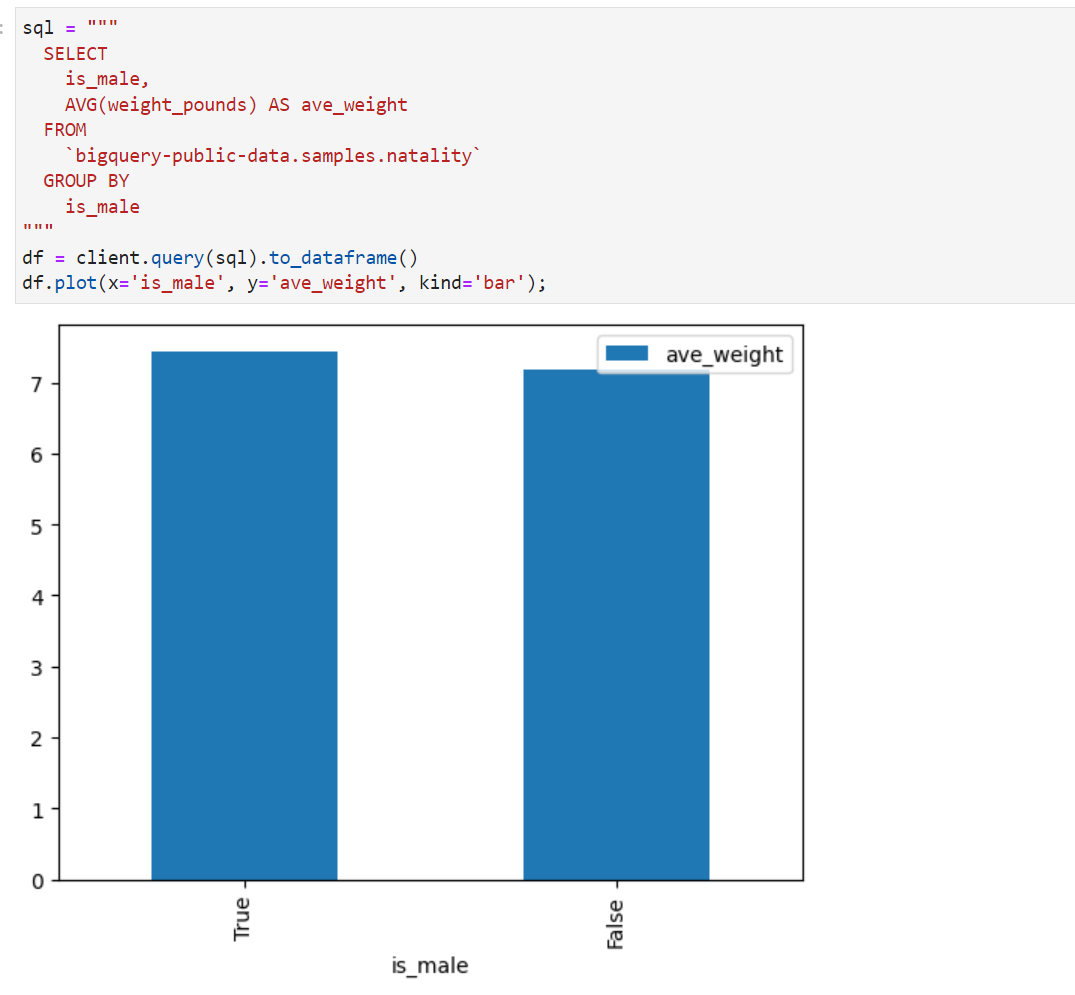

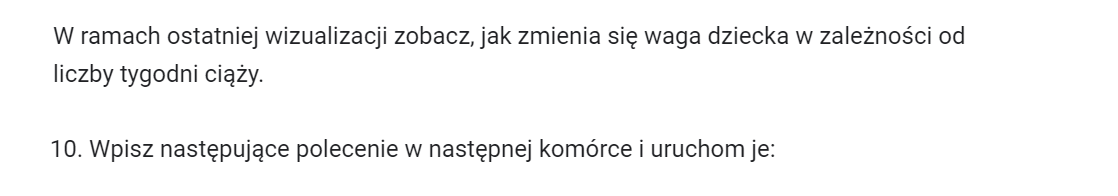

In [ ]:
sql = """
  SELECT
    gestation_weeks,
    AVG(weight_pounds) AS ave_weight
  FROM
    `bigquery-public-data.samples.natality`
  WHERE
    NOT IS_NAN(gestation_weeks) AND gestation_weeks <> 99
  GROUP BY
    gestation_weeks
  ORDER BY
    gestation_weeks
"""
df = client.query(sql).to_dataframe()
df.plot(x='gestation_weeks', y='ave_weight', kind='bar');

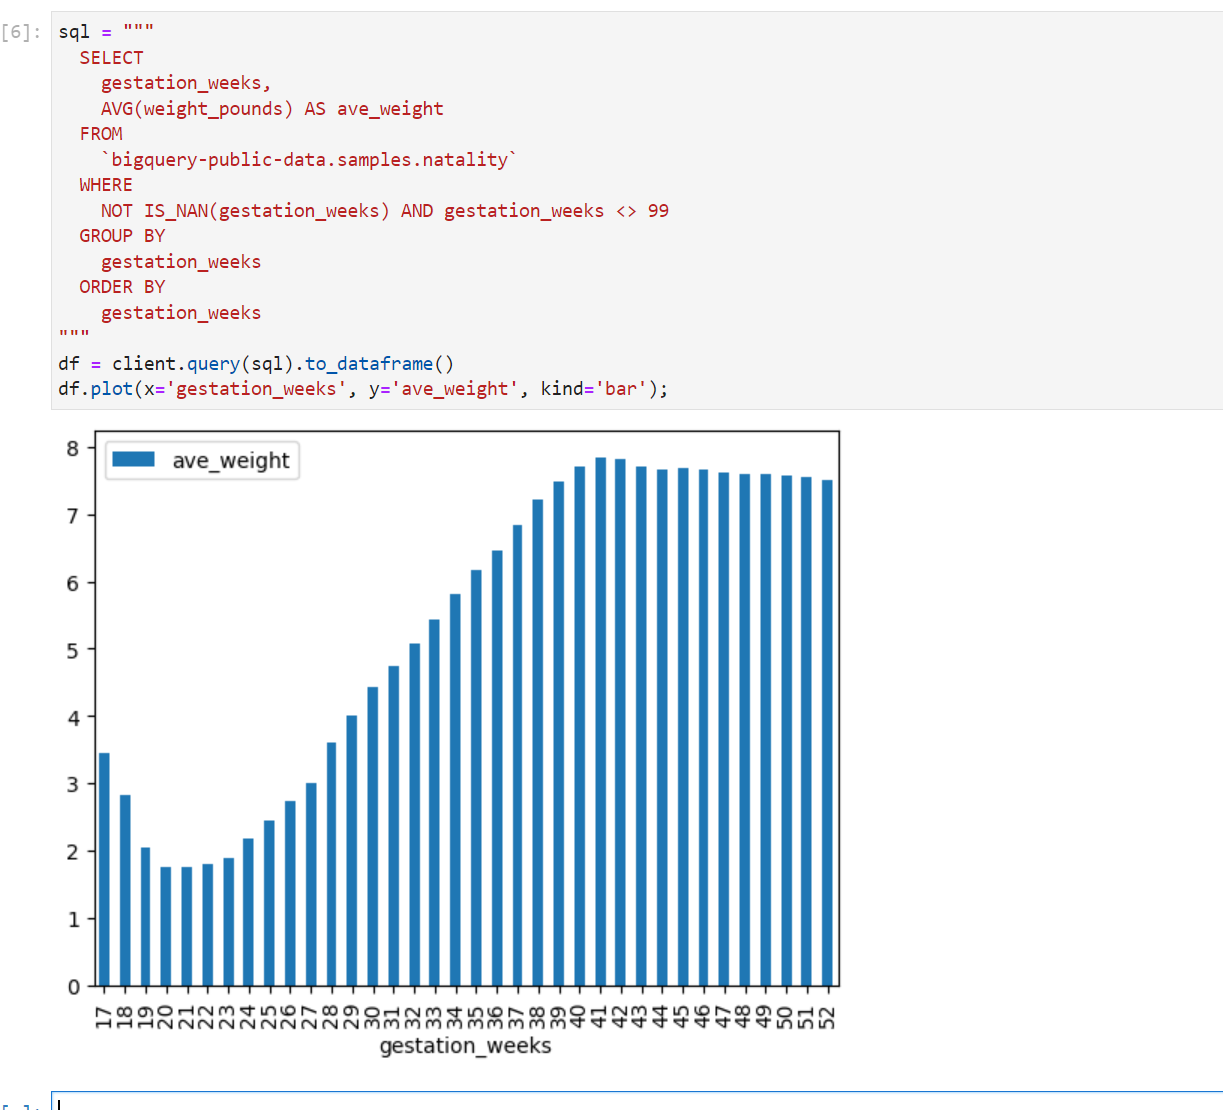

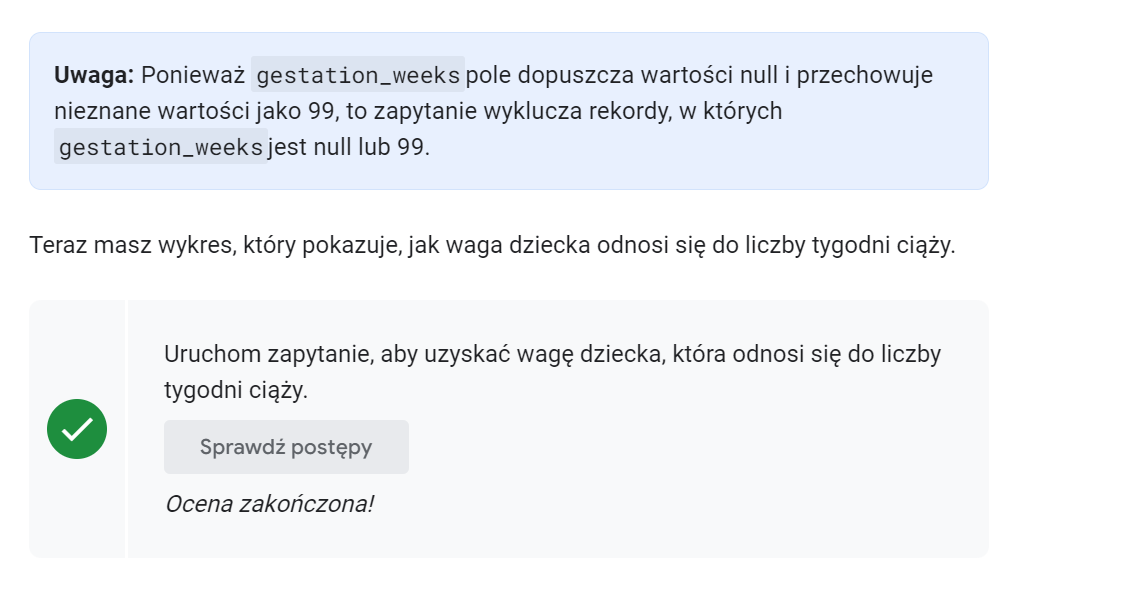